In [23]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [24]:
data = pd.read_csv('ex1data1.txt',sep = ',',header = None, names = ['Population','Profit'])

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(title='Profit Vs Population', ylabel='Profit in $10,000s', xlabel='Population of City in 10,000s')
ax.scatter(data['Population'],data['Profit'], color='red', marker='x')
#plt.show()

# Algorithm Implementation

## Cost Computation

In [26]:
def computeCost(theta,x,y):
    m = x.shape[0]
    h = np.matmul(x,np.transpose(theta))
    error = h-y
    cost = np.sum((np.square(error)))/(2*m)
    return cost

## Gradient Descent Algorithm

In [27]:
def gradientDescent(theta,x,y,alpha,n):
    m = x.shape[0]
    h = np.matmul(x,np.transpose(theta))
    error = h-y
    temp1 = theta[0][0] - (alpha*np.sum(error))/m
    temp2 = theta[0][1] - (alpha*np.sum(np.multiply(error,x[:,1].reshape(m,1))))/m
    theta[0][0] = temp1       
    theta[0][1] = temp2
    return theta

## Vectors Definition

In [28]:
m = data['Profit'].shape[0]
#Input Vector
X = np.column_stack((np.ones(m),data['Population']))
y = data['Profit'].reshape(m,1)
theta = np.zeros((1,2))
alpha = 0.01
n =1500

In [29]:
print("############################################################################################################")
print('The value of cost function for theta0 = 0 and theta1 = 0:    '+str(computeCost(theta,X,y)))
print("############################################################################################################")

############################################################################################################
The value of cost function for theta0 = 0 and theta1 = 0:    32.0727338775
############################################################################################################


## Run gradient descent algorithm

<IPython.core.display.Javascript object>


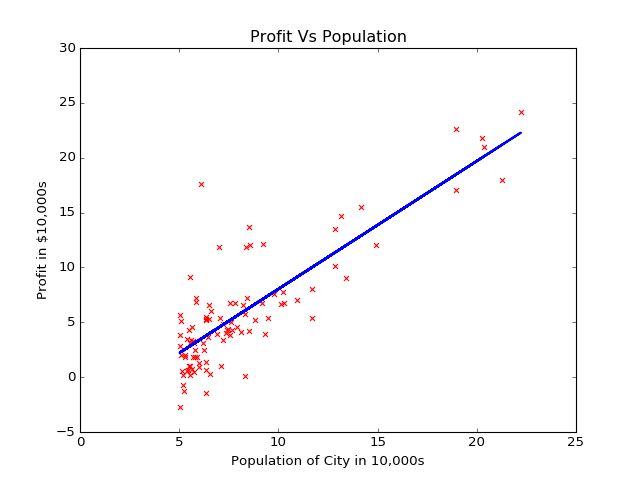

In [30]:
for i in range(n):
    theta = gradientDescent(theta,X,y,alpha,n)

ax.plot(X[:,1],np.matmul(X, np.transpose(theta)), color = "blue", linewidth = 2)
plt.show()

## Predictions

In [31]:
#Predict values for population sizes of 35,000 and 70,000
#1st Prediction
print("############################################################################################################")
print('For population = 35,000, we predict a profit of ' + str((np.matmul(np.array([1,3.5]),np.transpose(theta))*10000)[0]))
print("############################################################################################################")
#2nd prediction
print('For population = 70,000, we predict a profit of ' + str((np.matmul(np.array([1,7]),np.transpose(theta))*10000)[0]))
print("############################################################################################################")

############################################################################################################
For population = 35,000, we predict a profit of 4519.7678677
############################################################################################################
For population = 70,000, we predict a profit of 45342.4501294
############################################################################################################


In [32]:
[1,3.5]*theta

array([[-3.63029144,  4.08226823]])

In [33]:
#Error vs iteration

In [34]:
theta = np.zeros((1,2))
J_iter = np.zeros((n,1))

for i in range(n):
    J_iter[i] = computeCost(theta,X,y)
    theta = gradientDescent(theta,X,y,alpha,n)

<IPython.core.display.Javascript object>


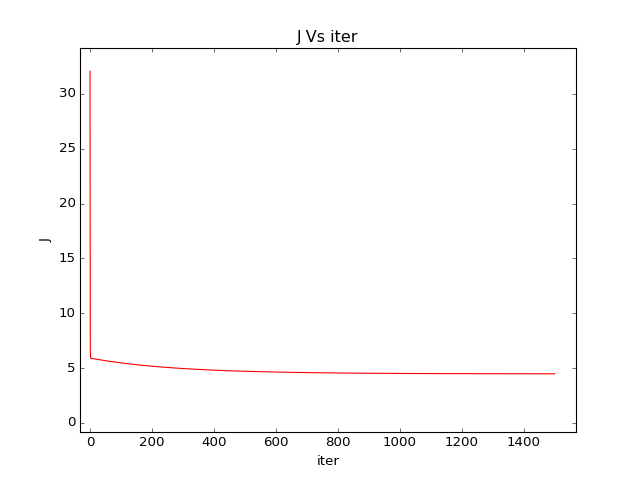

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(title='J Vs iter', ylabel='J', xlabel='iter')
ax.plot(range(n),J_iter, color='red')
plt.show()